In [1]:
# pip install dash
# pip install folium
# pip install geodesic

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import random

from dash.dependencies import Input, Output
from gensim.models import Word2Vec
from geopy.distance import geodesic
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\MB011B\AppData\Local\Temp\ipykernel_13700\380643755.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\MB011B\AppData\Local\Temp\ipykernel_13700\380643755.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# 資料集1

In [3]:
# 定義站點的經緯度座標
stations = {
    'Taipei': (25.047, 121.512),
    'Miaoli': (24.605, 120.825),
    'Yunlin': (23.736, 120.416),
    'Tainan': (22.924, 120.285),
    'Kaohsiung': (22.687, 120.309),
    'Hualien': (23.589, 121.494),
    'Taitung': (22.946, 121.137)
}

In [4]:
# 獲取經緯度數據
latitudes = [coord[0] for coord in stations.values()]
longitudes = [coord[1] for coord in stations.values()]

# 計算均值和標準差
mean_latitude = np.mean(latitudes)
std_latitude = np.std(latitudes)
mean_longitude = np.mean(longitudes)
std_longitude = np.std(longitudes)

# 正規化經緯度數據
normalized_latitudes = [(lat - mean_latitude) / std_latitude for lat in latitudes]
normalized_longitudes = [(lon - mean_longitude) / std_longitude for lon in longitudes]

# 建立正規化後的座標字典
normalized_coords = dict(zip(stations.keys(), zip(normalized_latitudes, normalized_longitudes)))

In [5]:
# 計算距離矩陣
dist_matrix = []

for station1 in normalized_coords.values():
    row = []
    for station2 in normalized_coords.values():
        dist = geodesic(station1, station2).kilometers
        row.append(dist)
    dist_matrix.append(row)

station_dist_matrix = pd.DataFrame(columns=stations, index=stations, data=dist_matrix)
station_dist_matrix

,Taipei,Miaoli,Yunlin,Tainan,Kaohsiung,Hualien,Taitung
Taipei,0.000000,164.416125,300.812456,393.902050,413.632802,194.230075,292.110547
Miaoli,164.416125,0.000000,147.487911,254.350703,280.283010,201.669229,231.702437
Yunlin,300.812456,147.487911,0.000000,112.042395,141.746369,241.756019,192.464920
Tainan,393.902050,254.350703,112.042395,0.000000,32.018099,284.377227,190.446253
Kaohsiung,413.632802,280.283010,141.746369,32.018099,0.000000,290.832558,188.239745
Hualien,194.230075,201.669229,241.756019,284.377227,290.832558,0.000000,117.053757
Taitung,292.110547,231.702437,192.464920,190.446253,188.239745,117.053757,0.000000


In [6]:
# 使用MDS進行降維
mds = MDS(n_components=2, dissimilarity='precomputed')
coords = mds.fit_transform(dist_matrix)

C:\Users\MB011B\anaconda3\envs\tensorflow-gpu2\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


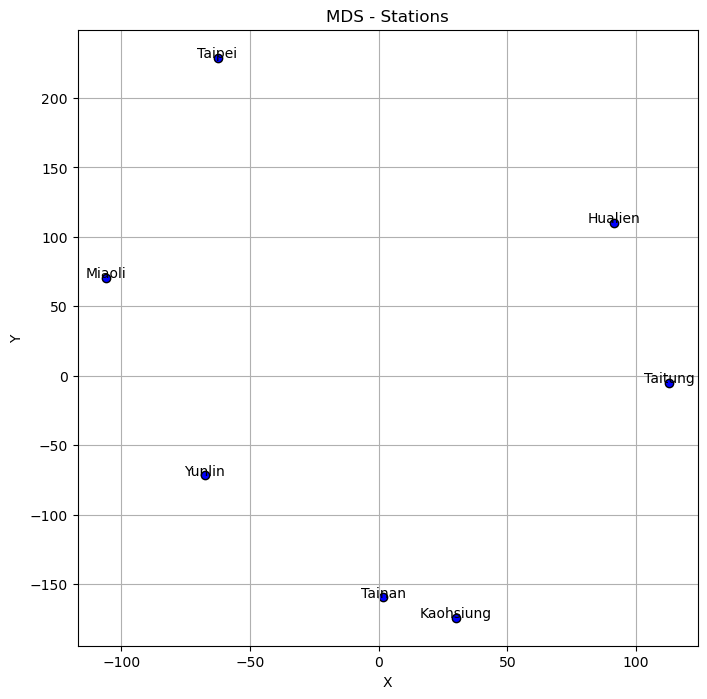

In [7]:
# 繪製圖形
x = coords[:, 0]
y = coords[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x, y, c='b', edgecolor='k')

for i, (label, pos) in enumerate(zip(stations.keys(), coords)):
    plt.annotate(label, pos, fontsize=10, ha='center')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('MDS - Stations')
plt.grid(True)
plt.show()

# GitHub無法顯示地圖，請下載觀看

In [8]:
# 創建地圖，設置中心點座標和初始縮放級別
m = folium.Map(location=[23.6, 120.9], zoom_start=7)

# 標記每個站點的位置
for label, coords in stations.items():
    folium.Marker(location=coords, tooltip=label).add_to(m)

m

# 資料集2

In [9]:
# Generate data for class A
class_a_data = {
    'Drink': ['7Up'] * 300,
    'Rank': [7] * 300,
    'Amount': np.random.normal(100, 200, 300),
    'Quantity': [random.randint(500, 1000) for _ in range(300)],
    'Class': ['A'] * 300
}

# Generate data for class B
class_b_data = {
    'Drink': ['Sprite'] * 150,
    'Rank': [6] * 150,
    'Amount': np.random.normal(200, 10, 150),
    'Quantity': [random.randint(500, 1000) for _ in range(150)],
    'Class': ['B'] * 150
}

# Generate data for class C
class_c_data = {
    'Drink': ['Pepsi'] * 150,
    'Rank': [5] * 150,
    'Amount': np.random.normal(200, 10, 150),
    'Quantity': [random.randint(500, 1000) for _ in range(150)],
    'Class': ['C'] * 150
}

# Generate data for class D
class_d_data = {
    'Drink': ['Coke'] * 300,
    'Rank': [4] * 300,
    'Amount': np.random.normal(400, 100, 300),
    'Quantity': [random.randint(500, 1000) for _ in range(300)],
    'Class': ['D'] * 300
}

# Generate data for class E
class_e_data = {
    'Drink': ['Cappuccino'] * 150,
    'Rank': [3] * 150,
    'Amount': np.random.normal(800, 10, 150),
    'Quantity': [random.randint(1, 500) for _ in range(150)],
    'Class': ['E'] * 150
}

# Generate data for class F
class_f_data = {
    'Drink': ['Espresso'] * 150,
    'Rank': [2] * 150,
    'Amount': np.random.normal(800, 10, 150),
    'Quantity': [random.randint(1, 500) for _ in range(150)],
    'Class': ['F'] * 150
}

# Generate data for class G
class_g_data = {
    'Drink': ['Latte'] * 300,
    'Rank': [1] * 300,
    'Amount': np.random.normal(900, 400, 300),
    'Quantity': [random.randint(1, 500) for _ in range(300)],
    'Class': ['G'] * 300
}

# Combine data from all classes
data = pd.DataFrame(
    class_a_data,
    columns=['Drink', 'Rank', 'Amount', 'Quantity', 'Class']
).append(
    pd.DataFrame(class_b_data, columns=['Drink', 'Rank', 'Amount', 'Quantity', 'Class']),
    ignore_index=True
).append(
    pd.DataFrame(class_c_data, columns=['Drink', 'Rank', 'Amount', 'Quantity', 'Class']),
    ignore_index=True
).append(
    pd.DataFrame(class_d_data, columns=['Drink', 'Rank', 'Amount', 'Quantity', 'Class']),
    ignore_index=True
).append(
    pd.DataFrame(class_e_data, columns=['Drink', 'Rank', 'Amount', 'Quantity', 'Class']),
    ignore_index=True
).append(
    pd.DataFrame(class_f_data, columns=['Drink', 'Rank', 'Amount', 'Quantity', 'Class']),
    ignore_index=True
).append(
    pd.DataFrame(class_g_data, columns=['Drink', 'Rank', 'Amount', 'Quantity', 'Class']),
    ignore_index=True
)

# Save the data to a CSV file
data.to_csv('drink_dataset.csv', index=False)

C:\Users\MB011B\AppData\Local\Temp\ipykernel_13700\748744706.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pd.DataFrame(
C:\Users\MB011B\AppData\Local\Temp\ipykernel_13700\748744706.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pd.DataFrame(
C:\Users\MB011B\AppData\Local\Temp\ipykernel_13700\748744706.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pd.DataFrame(
C:\Users\MB011B\AppData\Local\Temp\ipykernel_13700\748744706.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pd.DataFrame(
C:\Users\MB011B\AppData\Local\Temp\ipykernel_13700\748744706.py:65: FutureWarning: The frame.append meth

In [10]:
# Load the dataset
data = pd.read_csv('drink_dataset.csv')

# Encode the class labels
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Normalize the numeric features (Amount and Quantity)
numeric_features = ['Amount', 'Quantity']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [11]:
# One-hot encoding for Drink feature
drink_one_hot = pd.get_dummies(data['Drink'], prefix='Drink')

# Method 1: 1-of-k encoding for Drink feature
data_1_of_k = pd.concat([data, drink_one_hot], axis=1)

# Method 2: Word2Vec for Drink feature
drink_values = data['Drink'].values.tolist()
word2vec_model = Word2Vec([drink_values], min_count=1)
similarity_matrix = np.zeros((len(drink_values), len(drink_values)))

for i, drink1 in enumerate(drink_values):
    for j, drink2 in enumerate(drink_values):
        similarity_matrix[i][j] = word2vec_model.wv.similarity(drink1, drink2)

# Perform t-SNE for Method 1: 1-of-k encoding
tsne_1_of_k = TSNE(n_components=2, random_state=0)
tsne_result_1_of_k = tsne_1_of_k.fit_transform(data_1_of_k.drop(['Drink', 'Class'], axis=1))

# Perform t-SNE for Method 2: Word2Vec
tsne_similarity = TSNE(n_components=2, random_state=0)
tsne_result_similarity = tsne_similarity.fit_transform(similarity_matrix)

Class Mapping:
Class 0: A
Class 1: B
Class 2: C
Class 3: D
Class 4: E
Class 5: F
Class 6: G


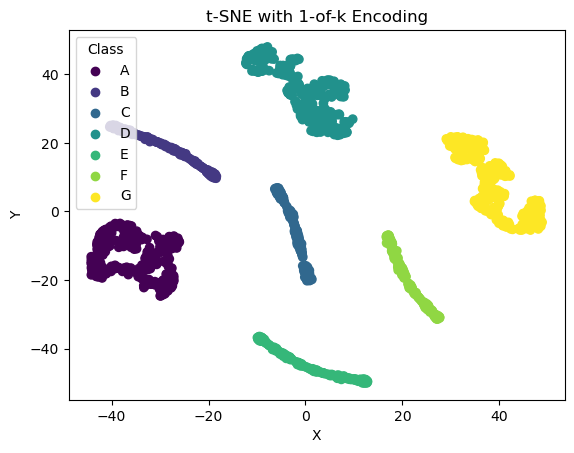

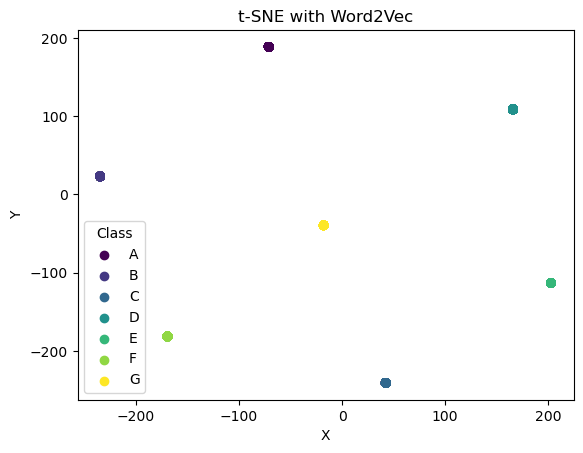

In [12]:
class_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
print("Class Mapping:")
for key, value in class_mapping.items():
    print(f"Class {key}: {value}")

# Plot the t-SNE results for Method 1: 1-of-k encoding
scatter = plt.scatter(tsne_result_1_of_k[:, 0], tsne_result_1_of_k[:, 1], c=data['Class'])
plt.title("t-SNE with 1-of-k Encoding")
plt.xlabel("X")
plt.ylabel("Y")

# Add legend
class_labels = label_encoder.inverse_transform(np.unique(data['Class']))
class_handles = [plt.scatter([], [], color=scatter.cmap(scatter.norm(label_encoder.transform([label]))[0]), label=label) for label in class_labels]
plt.legend(handles=class_handles, title='Class')

plt.show()

# Plot the t-SNE results for Method 2: Similarity-based encoding
scatter = plt.scatter(tsne_result_similarity[:, 0], tsne_result_similarity[:, 1], c=data['Class'])
plt.title("t-SNE with Word2Vec")
plt.xlabel("X")
plt.ylabel("Y")

# Add legend
plt.legend(handles=class_handles, title='Class')

plt.show()

# GitHub無法顯示互動式圖表，請下載觀看

In [13]:
# 建立Dash應用
app = dash.Dash(__name__)

# 定義布局
app.layout = html.Div([
    dcc.Graph(id='scatter-plot', figure={}),
    html.Pre(id='selected-data', style={'overflowX': 'scroll'})
])

# 回調函數：更新散點圖和選中的數據點
@app.callback(
    Output('scatter-plot', 'figure'),
    Output('selected-data', 'children'),
    Input('scatter-plot', 'selectedData')
)

def update_scatter_plot(selected_data):
    # 獲取選中的數據點
    if selected_data is not None:
        points = selected_data['points']
        selected_indices = [point['pointIndex'] for point in points]
        selected_points = data.loc[selected_indices]

        # 創建散點圖
        scatter_plot = go.Figure(
            data=go.Scatter(
                x=tsne_result_1_of_k[:, 0],
                y=tsne_result_1_of_k[:, 1],
                mode='markers',
                marker=dict(
                    color=data['Class'],
                    colorscale='Viridis',
                    opacity=0.7,
                    size=8,
                    showscale=True
                ),
                selectedpoints=selected_indices,
                selected=dict(marker=dict(color='red', size=10))
            ),
            layout=dict(
                title='Drink Dataset Scatter Plot',
                xaxis=dict(title='X'),
                yaxis=dict(title='Y'),
                hovermode='closest'
            )
        )

        return scatter_plot, selected_points.to_string(index=False)

    # 若未選擇數據點，則顯示整個數據集
    scatter_plot = go.Figure(
        data=go.Scatter(
            x=tsne_result_1_of_k[:, 0],
            y=tsne_result_1_of_k[:, 1],
            mode='markers',
            marker=dict(
                color=data['Class'],
                colorscale='Viridis',
                opacity=0.7,
                size=8,
                showscale=True
            )
        ),
        layout=dict(
            title='Drink Dataset Scatter Plot',
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            hovermode='closest'
        )
    )

    return scatter_plot, ''

# 運行應用
if __name__ == '__main__':
    app.run_server(debug=True, port=2222)